Notebook link: https://colab.research.google.com/drive/1MVyYmrcTGfrSi-0R5V4QQ-HCluBb1OA5#scrollTo=YRKH1_0pDSrW

In [1]:
!wget http://cb.lk/covid_19

--2021-03-04 21:20:16--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2021-03-04 21:20:18--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2021-03-04 21:20:19--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-03-04 21:20:19--  https://www.dropbox.com/s/raw/7

In [2]:
!ls

covid_19  sample_data


In [3]:
!unzip covid_19
!ls

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [4]:
train_path="CovidDataset/Train"
val_path="CovidDataset/Val"

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import Sequential, load_model
from keras.preprocessing import image

In [6]:
# CNN model
model=Sequential()
model.add(Conv2D(32, kernel_size=(3, 3,), activation='relu', input_shape=(224, 224, 3)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics='accuracy')

In [7]:
# Image generators
train_datagen=image.ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen=image.ImageDataGenerator(rescale=1.0/255)

In [13]:
train_generator=train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode='binary')
val_generator=val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=32, class_mode='binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [12]:
# Class labels
label2idx=train_generator.class_indices
print(label2idx)

{'Covid': 0, 'Normal': 1}


In [14]:
hist=model.fit_generator(train_generator, steps_per_epoch=7, epochs=12, validation_data=val_generator, validation_steps=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/12
7/7 [==============================] - 44s 2s/step - loss: 4.1378 - accuracy: 0.5528 - val_loss: 0.6718 - val_accuracy: 0.5000
Epoch 2/12
7/7 [==============================] - 9s 1s/step - loss: 0.6142 - accuracy: 0.6673 - val_loss: 0.5575 - val_accuracy: 0.9167
Epoch 3/12
7/7 [==============================] - 9s 1s/step - loss: 0.4792 - accuracy: 0.7689 - val_loss: 0.3556 - val_accuracy: 0.9500
Epoch 4/12
7/7 [==============================] - 9s 1s/step - loss: 0.3318 - accuracy: 0.8497 - val_loss: 0.2211 - val_accuracy: 0.9500
Epoch 5/12
7/7 [==============================] - 9s 1s/step - loss: 0.2757 - accuracy: 0.8901 - val_loss: 0.2117 - val_accuracy: 0.9500
Epoch 6/12
7/7 [==============================] - 9s 1s/step - loss: 0.2709 - accuracy: 0.8913 - val_loss: 0.1708 - val_accuracy: 0.9667
Epoch 7/12
7/7 [==============================] - 9s 1s/step - loss: 0.2339 - accuracy: 0.9172 - val_loss: 0.1212 - val_accuracy: 0.9667
Epoch 8/12
7/7 [========================

In [15]:
# Saving the model
model.save("model_adv.h5")

In [17]:
# Evaluation
print("Train", model.evaluate_generator(train_generator))
print("Val", model.evaluate_generator(val_generator))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.05648036673665047, 0.9866071343421936]
[0.05786680430173874, 0.9666666388511658]


In [21]:
# Making predicions
model=load_model("model_adv.h5") # Loading the saved model
Y_actual=[]
Y_test=[]

In [25]:
import os
for img_name in os.listdir(os.path.join(val_path, "Normal/")):
  img=image.load_img(os.path.join(val_path, "Normal/")+img_name, target_size=(224, 224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  Y_test.append(p[0, 0])
  Y_actual.append(label2idx["Normal"])

for img_name in os.listdir(os.path.join(val_path, "Covid/")):
  img=image.load_img(os.path.join(val_path, "Covid/")+img_name, target_size=(224, 224))
  img=image.img_to_array(img)
  img=np.expand_dims(img, axis=0)
  p=model.predict_classes(img)
  Y_test.append(p[0, 0])
  Y_actual.append(label2idx["Covid"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


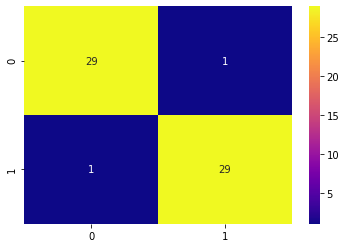

In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(np.array(Y_actual), np.array(Y_test))
sns.heatmap(cm, cmap='plasma', annot=True)
plt.show()